# Project Prototype 

In [1]:
import pandas as pd
from scipy import stats

Mortality = pd.read_csv("Mortality Both Sexes.csv")
MortalityF = pd.read_csv("Mortality Female.csv")
MortalityM = pd.read_csv("Mortality Male.csv")
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv")

#new things
Mortality = Mortality[Mortality['Period']>=2000]
Mortality = Mortality[Mortality['Period']<=2016]
Mortality = Mortality.drop(columns = 'DateModified', axis= '1')


Alcohol = Alcohol[Alcohol['Year']>=2000]
Alcohol = Alcohol[Alcohol['Year']<=2016]
Alcohol = Alcohol.drop(columns = {'WHO Region Code',
                                  'Country Code','Alcohol total per capita (15+) consumption in liters (string)'},
                       axis= '1')

In [2]:
Mortality.head()

,Unnamed: 0,ParentLocation,Location,Period,Sex,Adult mortality rate
0,0,Americas,Barbados,2016,Both sexes,100.4
1,1,Europe,Serbia,2016,Both sexes,102.5
2,2,Europe,Turkey,2016,Both sexes,104.0
3,3,Europe,Slovakia,2016,Both sexes,104.1
4,4,Western Pacific,Samoa,2016,Both sexes,110.4


In [3]:
Alcohol.head()

,WHO Region,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
1692,Eastern Mediterranean,Kuwait,2016,Both sexes,0.0,0.0,0.0
1693,Eastern Mediterranean,Kuwait,2016,Female,0.0,0.0,0.0
1694,Eastern Mediterranean,Kuwait,2016,Male,0.0,0.0,0.0
1695,Africa,Mauritania,2016,Both sexes,0.0,0.0,0.0
1696,Africa,Mauritania,2016,Female,0.0,0.0,0.0


In [4]:
#more cleanup!!!!
import seaborn as sns


Mortality = Mortality[Mortality['Location']!= 'South Sudan']
Mortality = Mortality[Mortality['Location']!= 'Sudan']

Alcohol = Alcohol[Alcohol['Country']!='Cook Islands']
Alcohol = Alcohol[Alcohol['Country']!='Dominica']
Alcohol = Alcohol[Alcohol['Country']!='Nauru']
Alcohol = Alcohol[Alcohol['Country']!='Niue']
Alcohol = Alcohol[Alcohol['Country']!='Saint Kitts and Nevis']
Alcohol = Alcohol[Alcohol['Country']!='Surinam']
Alcohol = Alcohol[Alcohol['Country']!='Tuvalu']
Alcohol = Alcohol[Alcohol['Country']!='Andorra']

### Question 1


### Question 2

In [5]:
byLocMort = Mortality.groupby('Location').mean()
byLocMort = byLocMort.rename_axis('Location').reset_index()

byLocMortLowest = byLocMort.sort_values('Adult mortality rate')
byLocMortHighest = byLocMort.sort_values('Adult mortality rate',ascending = False)
#print(byLocMort)

byLocAlc = Alcohol.groupby('Country').mean()
byLocAlc = byLocAlc.rename_axis('Country').reset_index()


byLocAlc['alc'] = byLocAlc['Alcohol total per capita (15+) consumption in liters (numeric)']
#print(byLocAlc)
byLocAlcLowest = byLocAlc.sort_values('alc')
byLocAlcHighest = byLocAlc.sort_values('alc',ascending = False)

In [6]:
byLocMortLowest.head()

,Location,Unnamed: 0,Period,Adult mortality rate
74,Iceland,1608.529412,2008.0,59.274118
155,Switzerland,1610.000000,2008.0,61.354706
103,Malta,1610.176471,2008.0,61.419412
154,Sweden,1611.000000,2008.0,62.229412
81,Italy,1610.647059,2008.0,62.236471


In [7]:
byLocMortHighest.head()

,Location,Unnamed: 0,Period,Adult mortality rate
180,Zimbabwe,1606.529412,2008.0,549.347059
93,Lesotho,1604.882353,2008.0,536.264706
55,Eswatini,1605.176471,2008.0,528.958824
31,Central African Republic,1603.117647,2008.0,491.682353
144,Sierra Leone,1600.647059,2008.0,452.135294


In [8]:
byLocAlcLowest.head()

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation),alc
140,Saudi Arabia,2008.0,0.000000,0.000000,0.000000,0.000000
149,Somalia,2008.0,0.000000,0.000000,0.000000,0.000000
104,Mauritania,2008.0,0.000000,0.000000,0.000000,0.000000
88,Kuwait,2008.0,0.000000,0.000000,0.000000,0.000000
12,Bangladesh,2008.0,0.001882,0.000016,0.009706,0.001882


In [9]:
byLocAlcHighest.head()

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation),alc
96,Lithuania,2008.0,16.292941,14.421569,19.124314,16.292941
134,Russian Federation,2008.0,15.963137,13.728431,18.804510,15.963137
133,Romania,2008.0,15.598235,13.470196,18.063333,15.598235
167,Uganda,2008.0,14.816471,12.284118,17.577255,14.816471
42,Czechia,2008.0,14.687451,12.646863,16.963725,14.687451


In [10]:
print(byLocMort.shape)
print(byLocAlc.shape)

(181, 4)
(181, 6)


In [11]:
#For cleanup, no longer needed

'''
countryMort = byLocMort.sort_values('Location')
countryAlc = byLocAlc.sort_values('Country')

countryMort = list(countryMort['Location'])
countryAlc = list(countryAlc['Country'])

y = 'Angola'
print(y)
if y in countryAlc:
    print('is in countryAlc and countryMort')
else:
    print('isnt in countryAlc, needs to be removed from countryMort')
    
x = 'Andorra'
if x in countryMort:
    print(x)
    print(' is in countryMort and countryAlc')
else:
    print(x)
    print('isnt in CountryMort, needs to be removed from countryAlc')
    
print('START LOOP')

#print(countryMort)
for i in range(0, 181):
    first = countryMort[i]
    second = countryAlc[i]
    if first != second:
        print(len(countryMort))
        print(first)
        print(len(countryAlc))
        print(second)
        break
        '''

"\ncountryMort = byLocMort.sort_values('Location')\ncountryAlc = byLocAlc.sort_values('Country')\n\ncountryMort = list(countryMort['Location'])\ncountryAlc = list(countryAlc['Country'])\n\ny = 'Angola'\nprint(y)\nif y in countryAlc:\n    print('is in countryAlc and countryMort')\nelse:\n    print('isnt in countryAlc, needs to be removed from countryMort')\n    \nx = 'Andorra'\nif x in countryMort:\n    print(x)\n    print(' is in countryMort and countryAlc')\nelse:\n    print(x)\n    print('isnt in CountryMort, needs to be removed from countryAlc')\n    \nprint('START LOOP')\n\n#print(countryMort)\nfor i in range(0, 181):\n    first = countryMort[i]\n    second = countryAlc[i]\n    if first != second:\n        print(len(countryMort))\n        print(first)\n        print(len(countryAlc))\n        print(second)\n        break\n        "

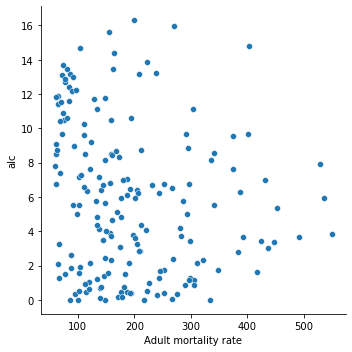

In [12]:
current = pd.DataFrame()
my2008Mort = byLocMort[byLocMort['Period']==2008]
my2008Alc = byLocAlc[byLocAlc['Year']== 2008]

#merge2008 = pd.merge(my2008Mort,my2008Alc, left_on = ['Location'],right_on = ['Country'])
#print(merge2008)

#for myYear in range(2008, 2017):
 #   tempAlc = 

#merge byLocMort and byLocAlc
#plot Alcohol Consumption Numeric against Adult Mortality Rate in a line plot, colored by Country
merged = pd.merge(byLocMort,byLocAlc, left_on = ['Location','Period'],right_on = ['Country', 'Year'])

sns.relplot(data = merged, x='Adult mortality rate', y='alc',kind='scatter')#hue = 'Country'


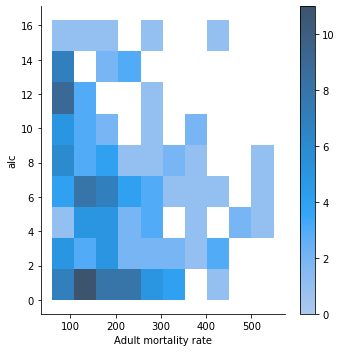

In [13]:
sns.displot(data=merged, x="Adult mortality rate", y="alc", cbar=True)

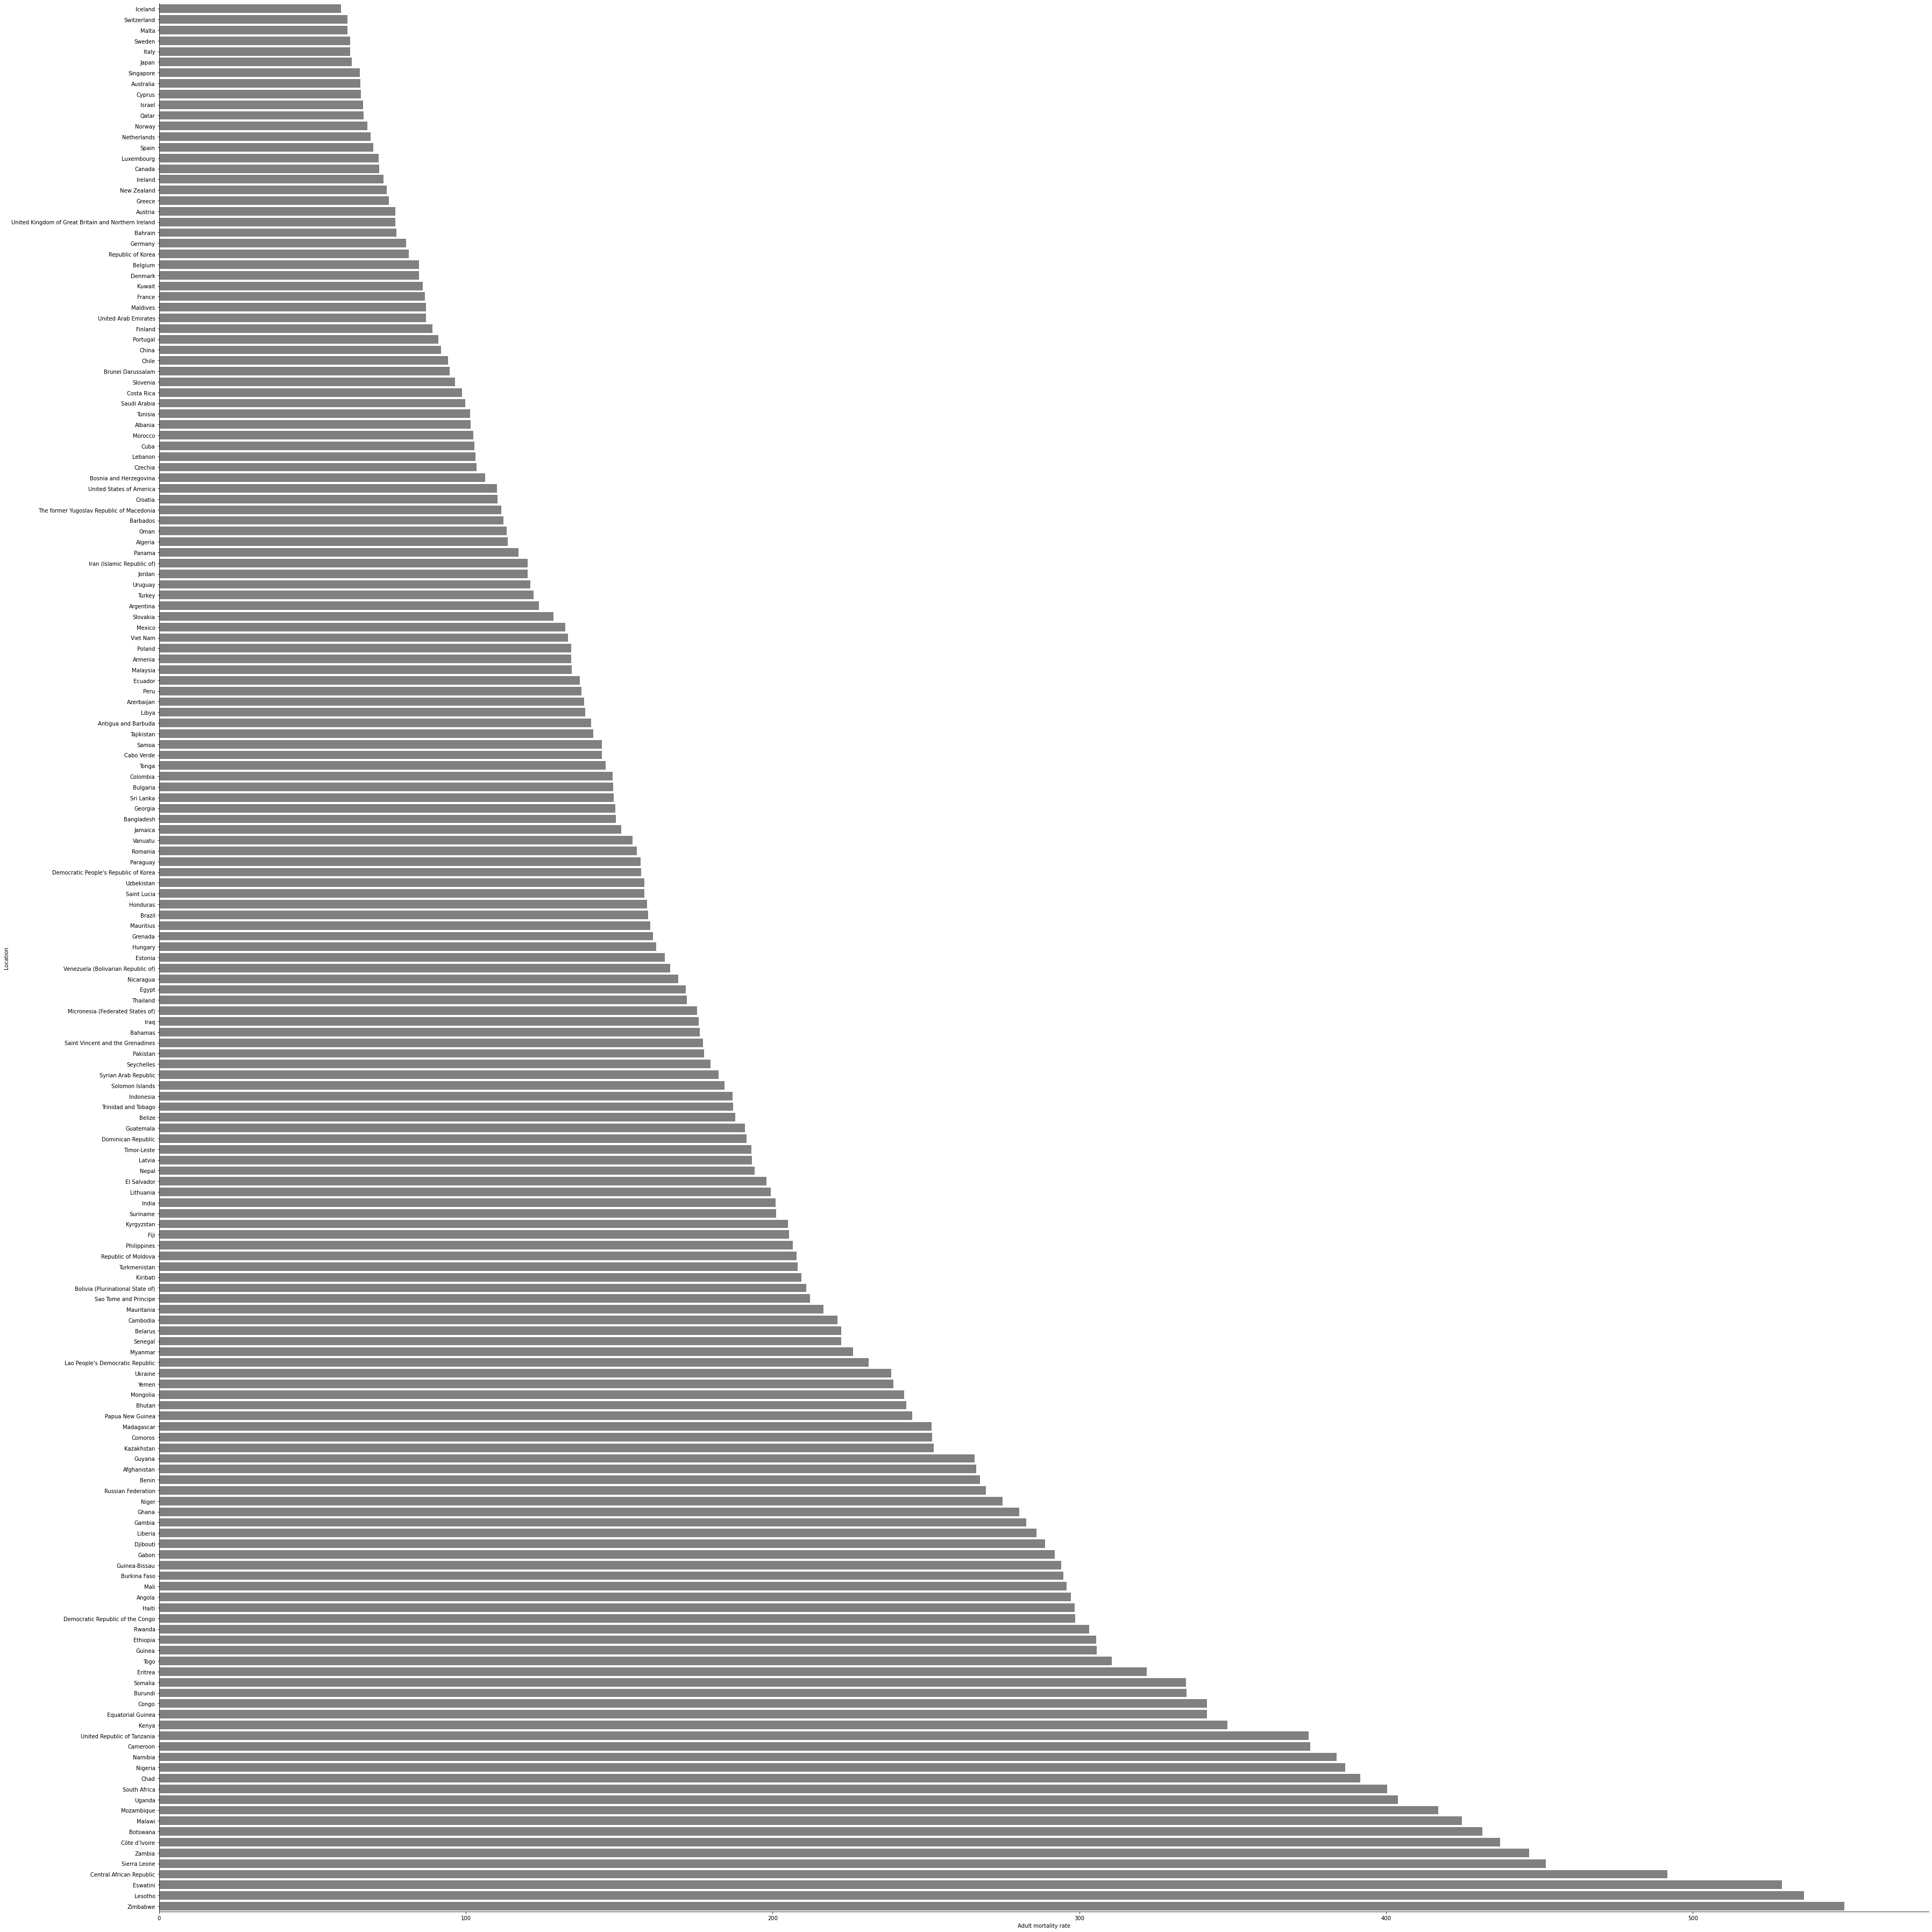

In [14]:
sortMort = merged.sort_values('Adult mortality rate')
sns.catplot(y="Location", x="Adult mortality rate", data=sortMort, kind='bar', color='gray', height = 50)


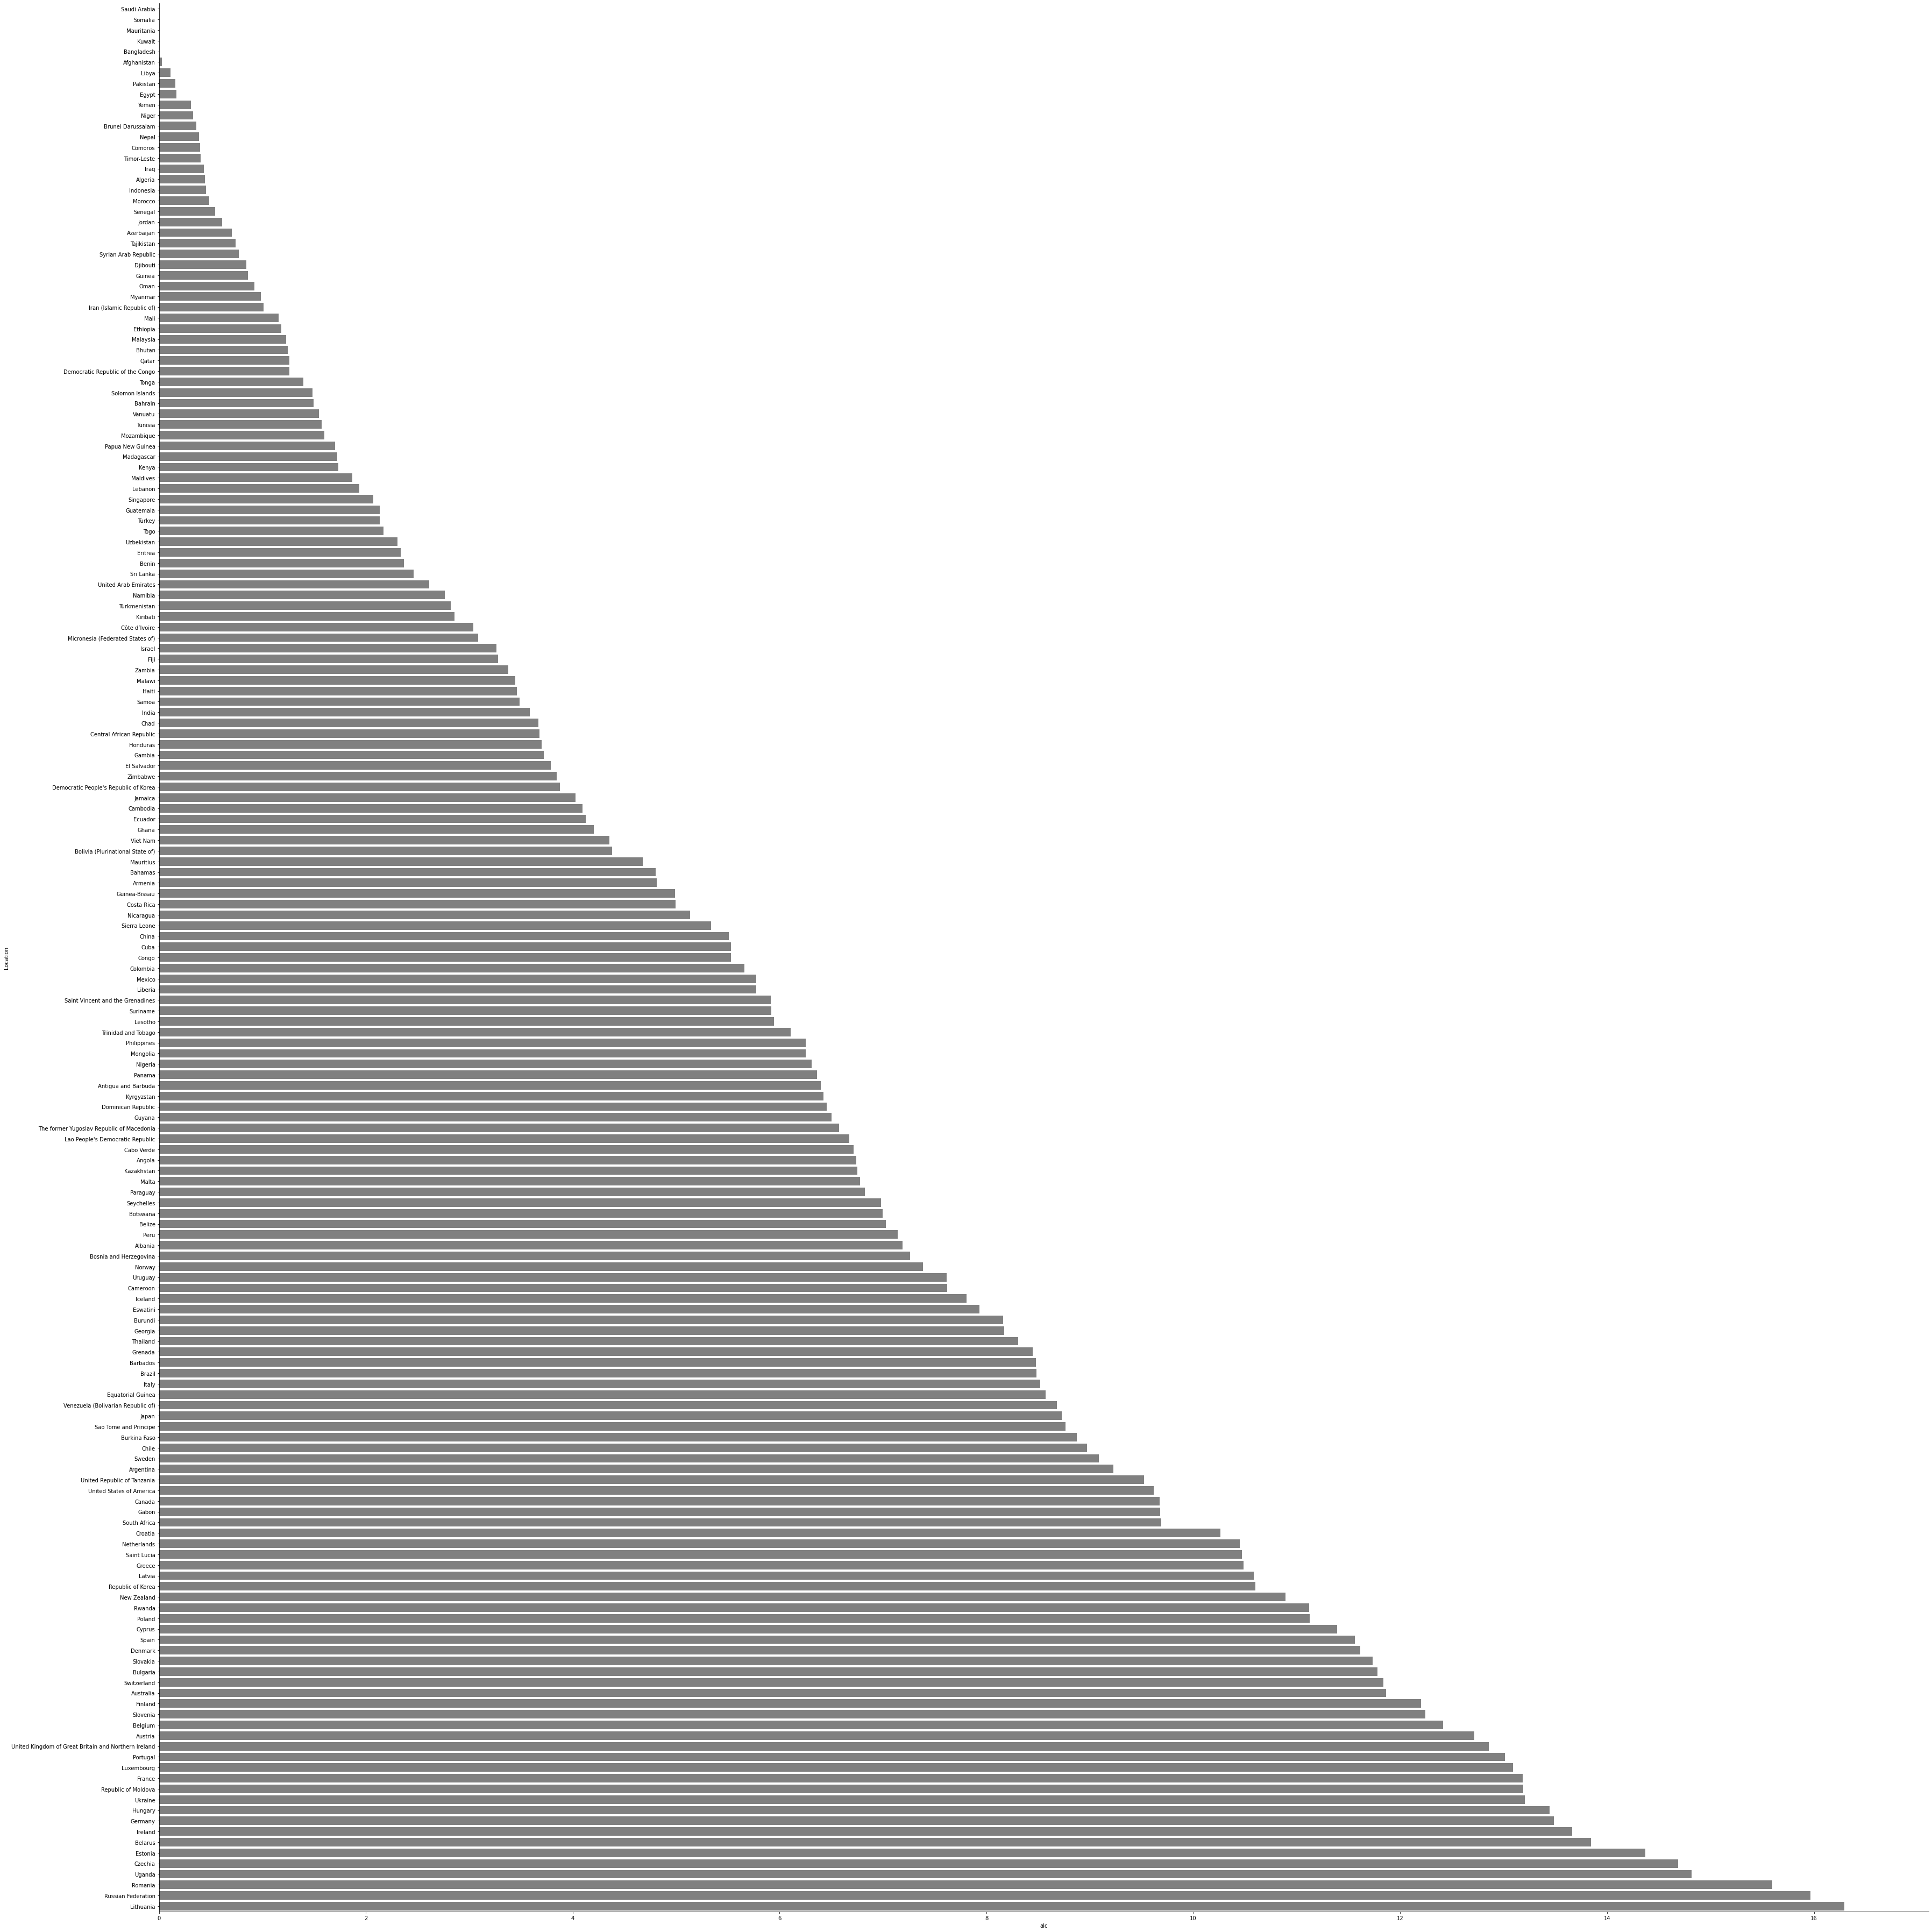

In [15]:
sortAlc = merged.sort_values('alc')
sns.catplot(y="Location", x="alc", data=sortAlc, kind='bar', color='gray', height = 50)

In [16]:
#HIGH ALC CONSUMPTION, HIGH MORTALITY RATES
alc_med = merged["alc"].mean()
mort_med = merged["Adult mortality rate"].mean()
filtered_alc = merged[merged["alc"] > alc_med]

pval = stats.ttest_1samp(filtered_alc["Adult mortality rate"], mort_med, alternative="greater")[1]
print("p-value is " + str(pval) + ", therefore we do not reject the null hypothesis.")

p-value is 0.9457044534896273, therefore we do not reject the null hypothesis.


In [17]:
#LOW ALC CONSUMPTION, HIGH MORTALITY RATES
alc_med = merged["alc"].mean()
mort_med = merged["Adult mortality rate"].mean()
filtered_alc = merged[merged["alc"] < alc_med]

pval = stats.ttest_1samp(filtered_alc["Adult mortality rate"], mort_med, alternative="greater")[1]
print("p-value is " + str(pval) + ", therefore we do not reject the null hypothesis.")

p-value is 0.05417026278321039, therefore we do not reject the null hypothesis.


In [18]:
#LOW ALC CONSUMPTION, LOW MORTALITY RATES
alc_med = merged["alc"].mean()
mort_med = merged["Adult mortality rate"].mean()
filtered_alc = merged[merged["alc"] < alc_med]

pval = stats.ttest_1samp(filtered_alc["Adult mortality rate"], mort_med, alternative="less")[1]
print("p-value is " + str(pval) + ", therefore we do not reject the null hypothesis.")

p-value is 0.9458297372167896, therefore we do not reject the null hypothesis.


In [19]:
#HIGH ALC CONSUMPTION, LOW MORTALITY RATES
alc_med = merged["alc"].mean()
mort_med = merged["Adult mortality rate"].mean()
filtered_alc = merged[merged["alc"] > alc_med]

pval = stats.ttest_1samp(filtered_alc["Adult mortality rate"], mort_med, alternative="less")[1]
print("p-value is " + str(pval) + ", therefore we do not reject the null hypothesis.")

p-value is 0.05429554651037278, therefore we do not reject the null hypothesis.


### Question 3


### Question 4

### Question 5

In [20]:
accidents = pd.read_csv("accidents.csv")
accidents.rename(columns = {"Unnamed: 0":"Country", "Unnamed: 1":"Year", 
                            "Estimated number of road traffic deaths":"All road deaths", 
                           "Estimated number of road traffic deaths.1":"Male road deaths",
                           "Estimated number of road traffic deaths.2":"Female road deaths",
                           "Estimated road traffic death rate (per 100 000 population)":"Total road death rate",
                           "Estimated road traffic death rate (per 100 000 population).1":"Male road death rate",
                           "Estimated road traffic death rate (per 100 000 population).2":"Female road death rate"}, inplace=True)
accidents = accidents.iloc[1:,:]
accidents["All road deaths"] = [num.split(" ")[0] for num in accidents["All road deaths"]]
accidents["Male road deaths"] = [num.split(" ")[0] for num in accidents["Male road deaths"]]
accidents["Female road deaths"] = [num.split(" ")[0] for num in accidents["Female road deaths"]]
accidents["Total road death rate"] = [num.split(" ")[0] for num in accidents["Total road death rate"]]
accidents["Male road death rate"] = [num.split(" ")[0] for num in accidents["Male road death rate"]]
accidents["Female road death rate"] = [num.split(" ")[0] for num in accidents["Female road death rate"]]
accidents["All road deaths"]= accidents["All road deaths"].astype(int)
accidents["Male road deaths"] = accidents["Male road deaths"].astype(int)
accidents["Female road deaths"] = accidents["Female road deaths"].astype(int)
accidents["Total road death rate"] = accidents["Total road death rate"].astype(float)
accidents["Male road death rate"] = accidents["Male road death rate"].astype(float)
accidents["Female road death rate"] = accidents["Female road death rate"].astype(float)
accidents["Year"] = accidents["Year"].astype(int)
accidents = accidents[accidents['Year']>=2000]
accidents = accidents[accidents['Year']<=2016]

In [22]:
Alcohol['alc'] = Alcohol['Alcohol total per capita (15+) consumption in liters (numeric)']
df = pd.merge(Alcohol,accidents, left_on = ['Country','Year'],right_on = ['Country', 'Year'])
df = df.groupby('Country').mean()
df["alc"].corr(df["Total road death rate"])

-0.2995412121748023

Text(0.5, 1.0, 'Alcohol Consumption v.s. Road Accident Deaths by Country')

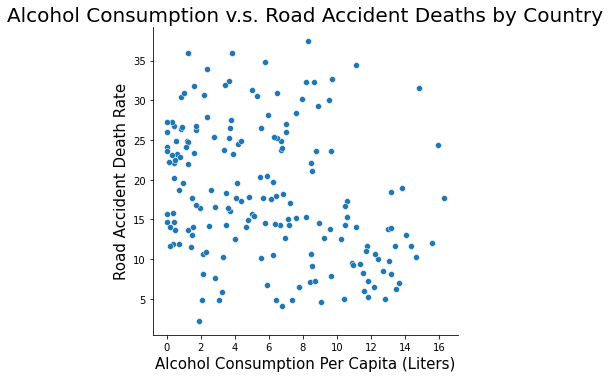

In [23]:
import matplotlib.pyplot as plt
sns.relplot(data=df, x='alc', y='Total road death rate')
plt.xlabel("Alcohol Consumption Per Capita (Liters)", fontsize=15)
plt.ylabel("Road Accident Death Rate", fontsize=15)
plt.title("Alcohol Consumption v.s. Road Accident Deaths by Country", fontsize=20)

In [30]:
print("Correlation between alc consumption and total road death rate:", df["alc"].corr(df["Total road death rate"]))
print("Correlation between alc consumption and male road death rate:", df["alc"].corr(df["Female road death rate"])
)

print("Correlation between alc consumption and male road death rate:", df["alc"].corr(df["Male road death rate"]))





Correlation between alc consumption and total road death rate: -0.2995412121748023
Correlation between alc consumption and male road death rate: -0.3155556243287253
Correlation between alc consumption and male road death rate: -0.2406904431904004


In [31]:
sortByDeaths = df.sort_values(by="Total road death rate", ascending=False)
sortByAlc = df.sort_values(by="alc", ascending=False)
sortByAlc = sortByAlc.reset_index()
print("Top 10 countries by road death rate")
top10 = df.sort_values(by="Total road death rate", ascending=False)[:10].index.values
for i in range(10): 
    print(str(i+1) + ". ", top10[i] + " ("+str(sortByAlc[sortByAlc["Country"]==top10[i]].index.values[0]+1) + "th in alc Consumption)")


Top 10 countries by road death rate
1.  Thailand (56th in alc Consumption)
2.  Democratic Republic of the Congo (145th in alc Consumption)
3.  Zimbabwe (108th in alc Consumption)
4.  Liberia (88th in alc Consumption)
5.  Rwanda (30th in alc Consumption)
6.  Eritrea (128th in alc Consumption)
7.  South Africa (39th in alc Consumption)
8.  Central African Republic (112th in alc Consumption)
9.  Burundi (58th in alc Consumption)
10.  Venezuela (Bolivarian Republic of) (50th in alc Consumption)


In [36]:
alc_med = df["alc"].mean()
road_med = df["Total road death rate"].mean()
filtered_alc = df[df["alc"] > alc_med]

$H0$ is that at most half of the countries that have an alcohol consumption per capita that is greater than the world mean (5.95) will have a road traffic death rate that is lower than the world mean (18.18). <br>
$H1$ is that more than half of the countries that have an alcohol consumption per capita that is greater than the world mean (5.95) will have a road traffic death rate that is lower than than the world mean (18.18) <br>
$p-value$ is the probability that 50% of the 98 countries that have an alcohol consumption per capita greater than the world mean (5.95) have a road rate of at most 18.18.


In [46]:
pval = stats.ttest_1samp(filtered_alc["Total road death rate"], road_med, alternative="less")[1]
print("p-value is " + str(pval) + ", therefore we reject the null hypothesis.")

p-value is 0.008743005110611796, therefore we reject the null hypothesis.


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [45]:

df = df.dropna()
data = df[["alc"]].values
target = df["Total road death rate"].values


linear_model = LinearRegression()
linear_model = linear_model.fit(X=data, y=target)


df["predicted_dr"] = linear_model.predict(data)
mse = mean_squared_error(df["Total road death rate"].values, df["predicted_dr"].values) # float: MSE
r2 = r2_score(df["Total road death rate"].values, df["predicted_dr"].values)  # float: R^2 score

print("MSE:", mse, "r^2:", r2)


MSE: 63.237127437611186 r^2: 0.08972493779114976
